# EDA


### Load Libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [3]:
print("📁 Current dir:", os.getcwd())
print("📂 Files here:", os.listdir("."))

# Check what's in the /data folder
if os.path.exists("data"):
    print("📂 Contents of /data:", os.listdir("data"))
else:
    print("❌ 'data' folder not found")

📁 Current dir: c:\Users\willi\Desktop\DA_PROJECTS\Quality_Defect_python\notebooks
📂 Files here: ['01-EDA.ipynb', '02-Model.ipynb']
❌ 'data' folder not found


In [4]:
df = pd.read_csv("../data/quality-defect.csv")

print("The dataset size is:" , df.shape)
df.head()


The dataset size is: (500, 11)


,PO_ID,Supplier_ID,Item_ID,Order_Date,Lead_Time_Days,Supplier_Rating,Quantity_Ordered,Unit_Price,Compliance_Flag,Defective_Units,Is_Defective
0,PO-1000,SUP-004,ITEM-02,2023-01-01,2,3.24,78,314.69,Yes,2,1
1,PO-1001,SUP-005,ITEM-04,2023-01-02,15,3.08,56,266.44,No,3,1
2,PO-1002,SUP-003,ITEM-04,2023-01-03,8,2.61,58,339.05,Yes,2,1
3,PO-1003,SUP-005,ITEM-01,2023-01-04,8,2.54,42,79.18,Yes,1,1
4,PO-1004,SUP-005,ITEM-02,2023-01-05,17,4.97,30,310.99,Yes,1,1


### Data types and nulls

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PO_ID             500 non-null    object 
 1   Supplier_ID       500 non-null    object 
 2   Item_ID           500 non-null    object 
 3   Order_Date        500 non-null    object 
 4   Lead_Time_Days    500 non-null    int64  
 5   Supplier_Rating   500 non-null    float64
 6   Quantity_Ordered  500 non-null    int64  
 7   Unit_Price        500 non-null    float64
 8   Compliance_Flag   500 non-null    object 
 9   Defective_Units   500 non-null    int64  
 10  Is_Defective      500 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB


In [19]:
print(df.isnull().sum())

PO_ID               0
Supplier_ID         0
Item_ID             0
Order_Date          0
Lead_Time_Days      0
Supplier_Rating     0
Quantity_Ordered    0
Unit_Price          0
Compliance_Flag     0
Defective_Units     0
Is_Defective        0
dtype: int64


In [21]:
df.describe()

,Lead_Time_Days,Supplier_Rating,Quantity_Ordered,Unit_Price,Defective_Units,Is_Defective
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.772000,3.772060,51.294000,271.493380,0.966000,0.662000
std,5.552087,0.732567,26.543562,128.151359,0.877716,0.473502
min,1.000000,2.510000,10.000000,50.700000,0.000000,0.000000
25%,5.000000,3.105000,29.000000,166.265000,0.000000,0.000000
50%,10.000000,3.800000,48.000000,272.905000,1.000000,1.000000
75%,15.000000,4.400000,74.000000,378.167500,1.000000,1.000000
max,19.000000,5.000000,99.000000,499.260000,4.000000,1.000000


### Defect rate

In [7]:
defect_rate = df["Is_Defective"].mean() * 100
print(f"The overall defect rate is: {defect_rate}%")

The overall defect rate is: 66.2%


### Defect Rate By Supplier

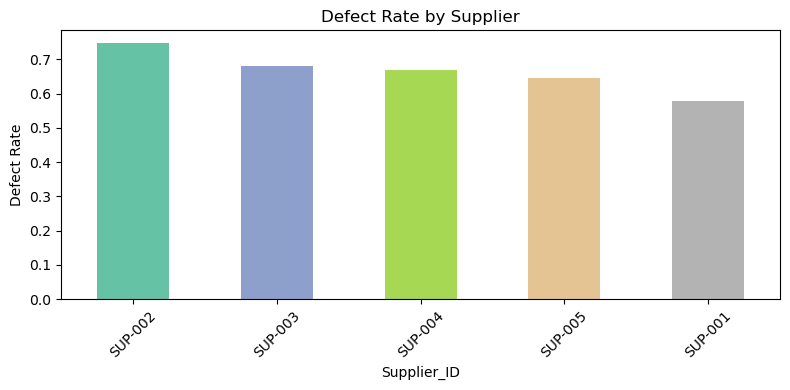

In [34]:
supplier_defects = df.groupby("Supplier_ID")["Is_Defective"].mean().sort_values(ascending=False)

# Create a color map with one color per bar
colors = cm.Set2(np.linspace(0, 1, len(supplier_defects)))  # You can use other cm like 'Set2', 'Pastel1', etc.

# Plot
plt.figure(figsize=(8, 4))
supplier_defects.plot(
    kind="bar",
    color=colors,
    title="Defect Rate by Supplier",
    ylabel="Defect Rate"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Compliance vs Defect rate

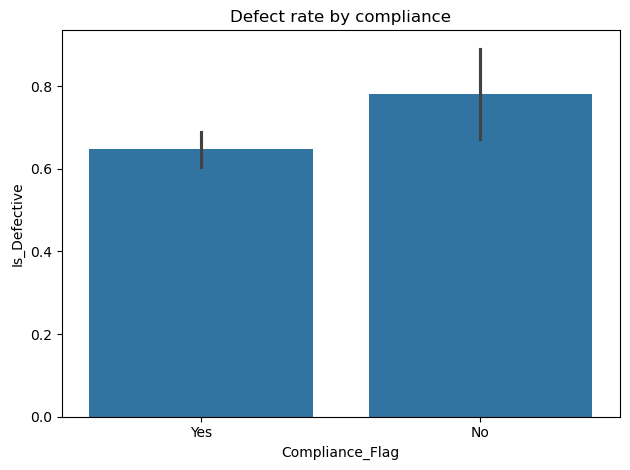

In [37]:
sns.barplot(data=df, x="Compliance_Flag", y="Is_Defective")
plt.title("Defect rate by compliance")
plt.tight_layout()
plt.show()

### Correlation Heatmap


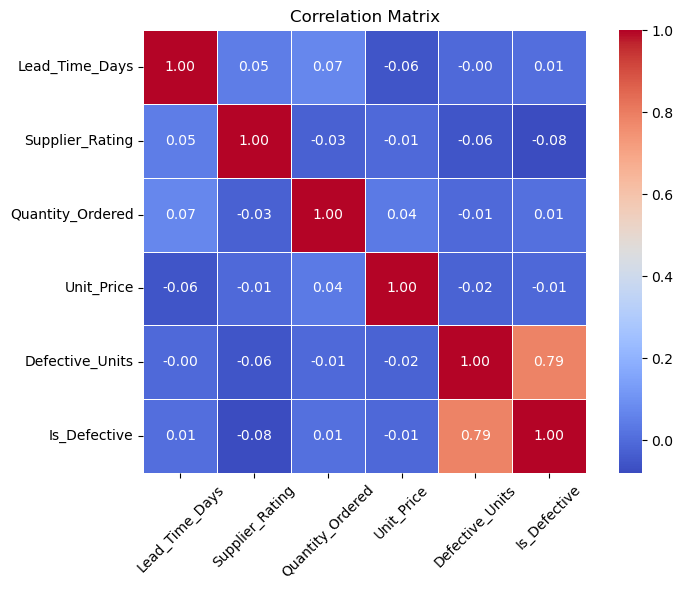

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()